https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [ ]:
dataset_path = "/content/drive/My Drive/Colab/Machine Learning/Datasets/Germany_electricity.csv"

In [ ]:
data = pd.read_csv(dataset_path)
data.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


With this dataset, we expect to answer the following questions:
- When is electricity consumption typically highest and lowest?
- How do wind and solar power production vary with seasons of the year?
- What are the long-term trends in electricity consumption, solar power and wind power?
- How do wind and solar power production compare with electricity consumption?
- How has this ratio changed over time?

# 1. Learning how to convert string of time/date formats to Pandas Timestamp

In [ ]:
pd.to_datetime("2018-01-15 3:45pm")

Timestamp('2018-01-15 15:45:00')

We can also supply an array of strings of time/date format, which Pandas will convert into a DatetimeIndex object

In [ ]:
pd.to_datetime(['2018-01-15', '7/8/1965', 'Oct 10, 1998'])

DatetimeIndex(['2018-01-15', '1965-07-08', '1998-10-10'], dtype='datetime64[ns]', freq=None)

If we have the timestamps in our data with the same format, using the *format* parameter speeds up Pandas read time.

In [ ]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/97'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '1997-12-15'], dtype='datetime64[ns]', freq=None)

# EDA

In [ ]:
data.shape

(4383, 5)

In [ ]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

We can directly set the Date column as the index of the dataframe.

In [ ]:
data = data.set_index('Date')
data.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
data.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

A similar but faster approach is using the *index_col* and *parse_dates* parameter from *read_csv*()

In [ ]:
data = pd.read_csv(dataset_path, index_col=0, parse_dates=True)
data.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

This time, instead of the dtype object, the index column is now a Datetime64 dtype.

Now that it is a Datetime64 dtype, we can access the Year, Month and Day directly, like this:

In [ ]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday

data.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2006-01-15,1265.475,NaN,NaN,NaN,2006,1,6
2016-04-02,1218.446,175.062,141.476,316.538,2016,4,5
2016-05-11,1441.717,304.436,180.639,485.075,2016,5,2
2017-02-02,1604.120,254.391,42.219,296.610,2017,2,3


There is also the function of time-based indexing.

In [ ]:
# A single day
data.loc['2017-03-03']

Consumption     1514.114
Wind             323.879
Solar             94.663
Wind+Solar       418.542
Year            2017.000
Month              3.000
Weekday Name       4.000
Name: 2017-03-03 00:00:00, dtype: float64

In [ ]:
# A range of days
data.loc['2017-03-03':'2017-03-15']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3
2017-03-10,1496.809,301.929,103.546,405.475,2017,3,4
2017-03-11,1265.416,142.969,119.270,262.239,2017,3,5


In [ ]:
# The entire month
data.loc['2017-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


# Visualizing time series data

In [ ]:
sns.set(rc={'figure.figsize': (16, 9)})

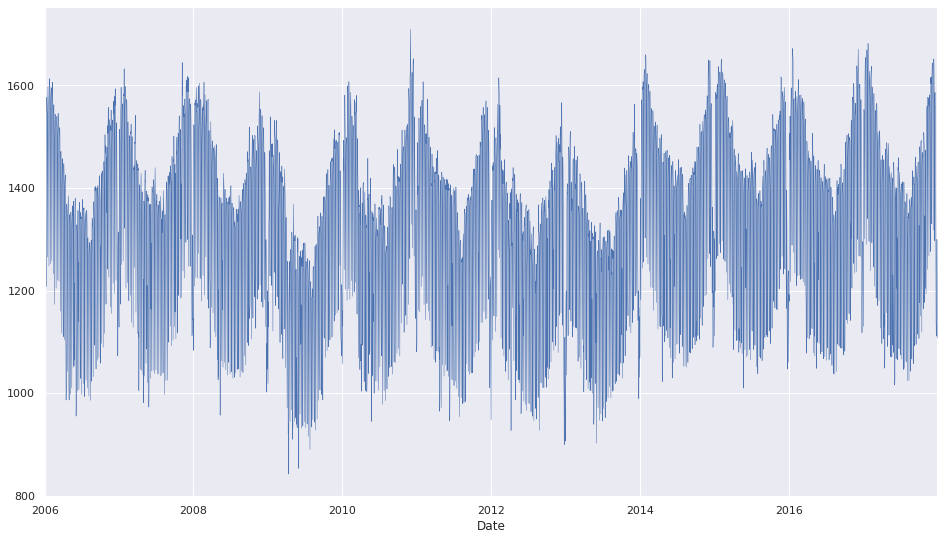

In [ ]:
data['Consumption'].plot(linewidth=0.5)

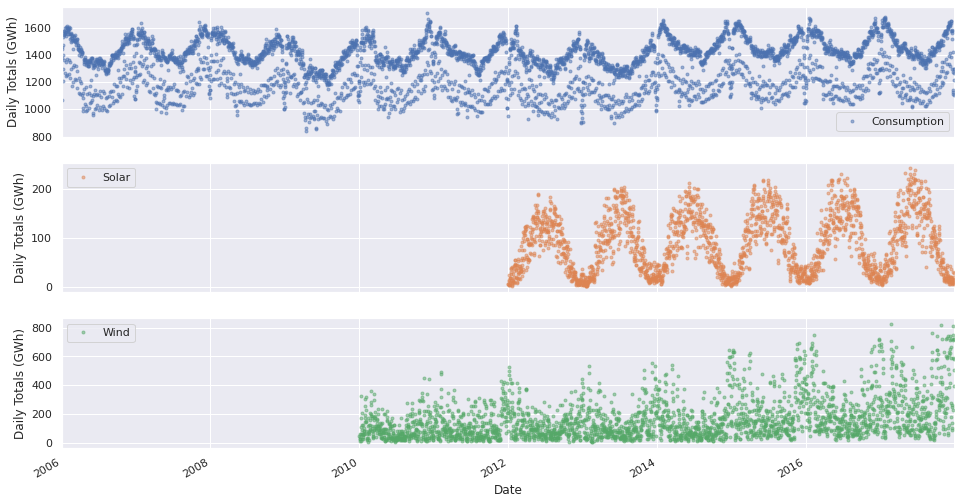

In [ ]:
columns_to_plot = ['Consumption', 'Solar', 'Wind']
axes = data[columns_to_plot].plot(marker='.', linestyle='None', alpha=0.5, figsize=(16, 9), subplots=True)

for ax in axes:
  ax.set_ylabel('Daily Totals (GWh)')

Let's look at the trend for one year

In [ ]:
data_year = data.loc['2017']
data_year

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,6
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,0
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,1
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,2
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


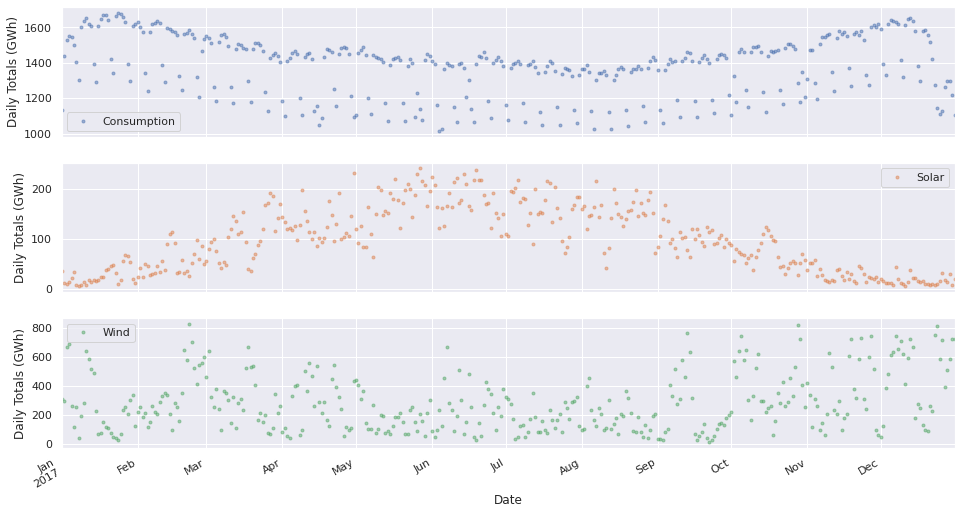

In [ ]:
columns_to_plot = ['Consumption', 'Solar', 'Wind']
axes = data_year[columns_to_plot].plot(marker='.', linestyle='None', alpha=0.5, figsize=(16, 9), subplots=True)

for ax in axes:
  ax.set_ylabel('Daily Totals (GWh)')

We can make several inferences from the plots above.

1. Power consumption is highest during the winter, which makes sense for heating purposes and lighting usages.
2. Power consumption is lowest during the summer.
3. The power consumption seems to be split into two clusters where one displays a higher consumption and the other at a lower range.
4. Solar power production peaks in the summer, which makes sense as sunlight is abundant.
5. Solar power production is the lowest during winter, which usually has longer nights and shorter days.
6. Wind power production has no significant trend, except higher production during the winter more frequently, probably due to stronger winds and winter weather.

Let's look at the seasonality of power consumption. We will look into the properties of a time-series problem in detail later.

Text(0, 0.5, 'Daily Consumption (GWh)')

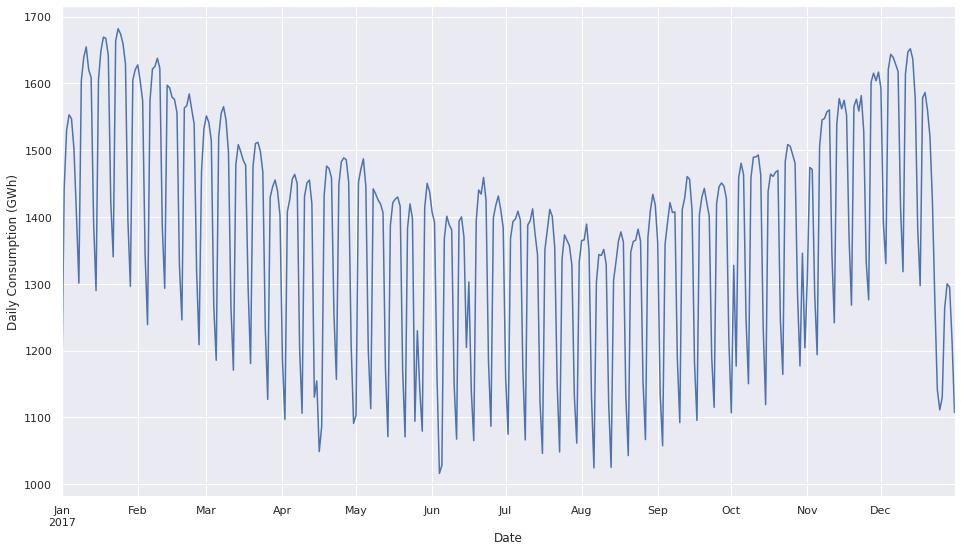

In [ ]:
ax = data.loc['2017', 'Consumption'].plot()
ax.set_ylabel("Daily Consumption (GWh)")

Upon observation, despite the peak in power consumption during the winter, we can see a drastic drop in power consumption in the late December and early January. 

Let's look at the data in a weekly format.

Text(0, 0.5, 'Daily Consumption (GWh)')

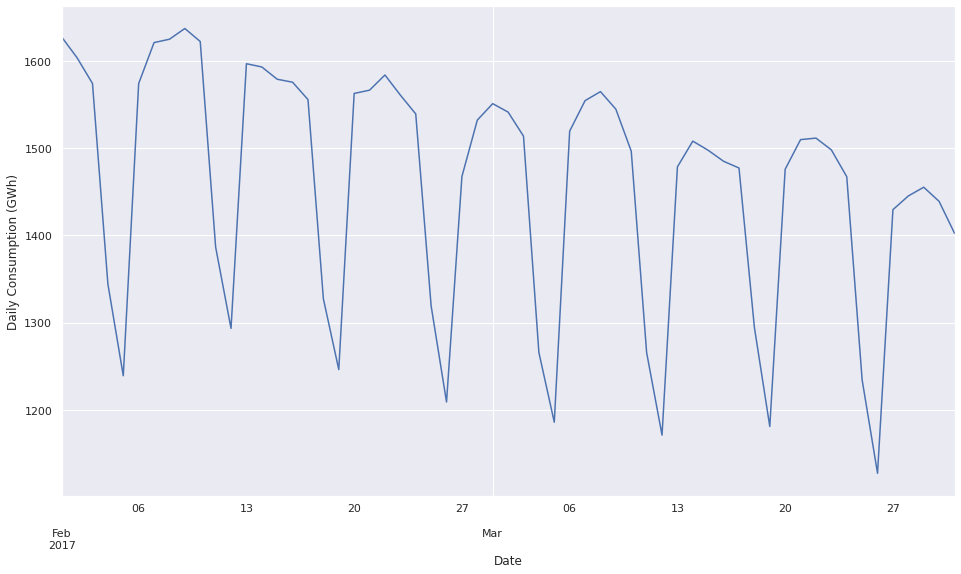

In [ ]:
ax = data.loc['2017-02':'2017-03', 'Consumption'].plot()
ax.set_ylabel("Daily Consumption (GWh)")

Text(0, 0.5, 'Daily Consumption (GWh)')

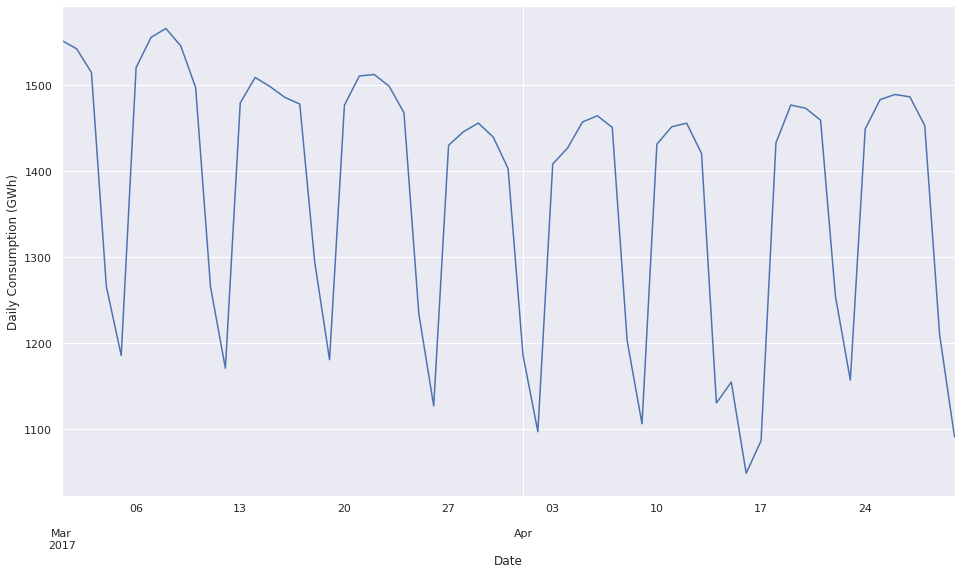

In [ ]:
ax = data.loc['2017-03':'2017-04', 'Consumption'].plot()
ax.set_ylabel("Daily Consumption (GWh)")

It seems like power consumption is highest during the weekdays, and lowest during the weekends.



---



Using matplotlib.dates, we can set the x axis tick labels on a specific day, now we know which days are weekdays and which are weekends.

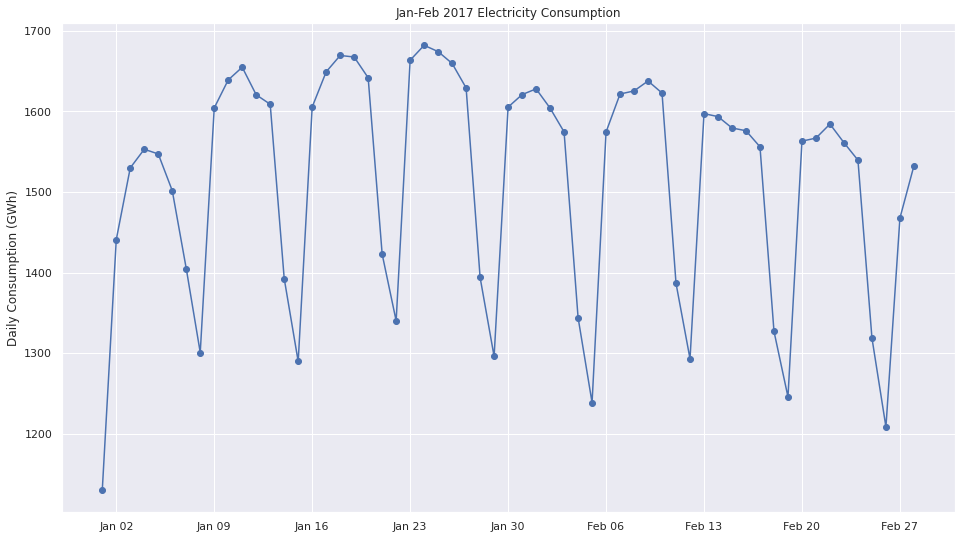

In [ ]:
fig, ax = plt.subplots()
ax.plot(data.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title("Jan-Feb 2017 Electricity Consumption")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Properties of Time-Series data

1. Seasonality: where a pattern repeats again at regular time intervals.

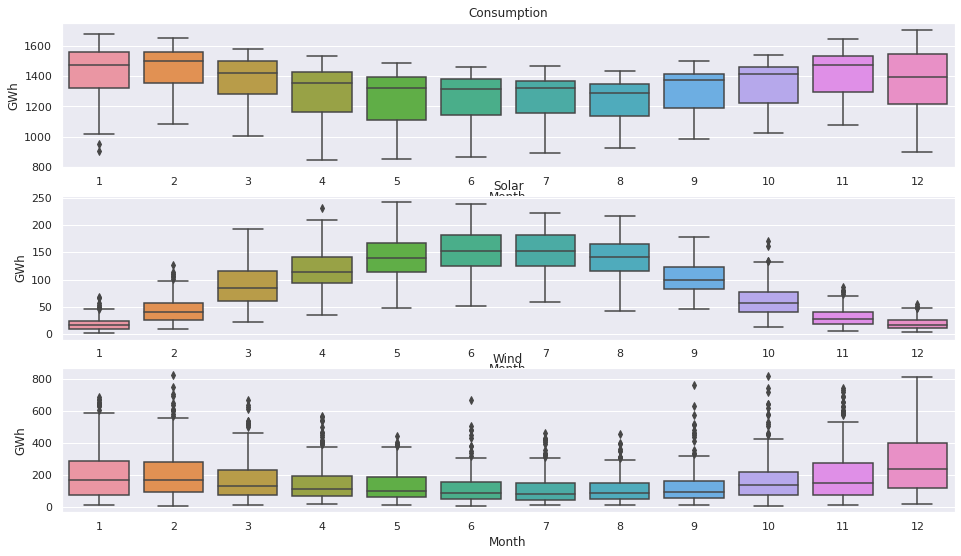

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=data, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)

From the box plots, we can see:

1. The median power consumption for the month of December is actually lower than in January, suggesting the peak in power consumption could be short-lived, there could be businesses that close due to the holiday season.

2. The solar power production is highest during summer and exhibits a yearly pattern.

3. The wind power production also shows a yearly pattern, but has more outliers, which may suggest that there could be extreme windspeeds at some point throughout the year that could have generated more power occasionally. But still a yearly pattern.

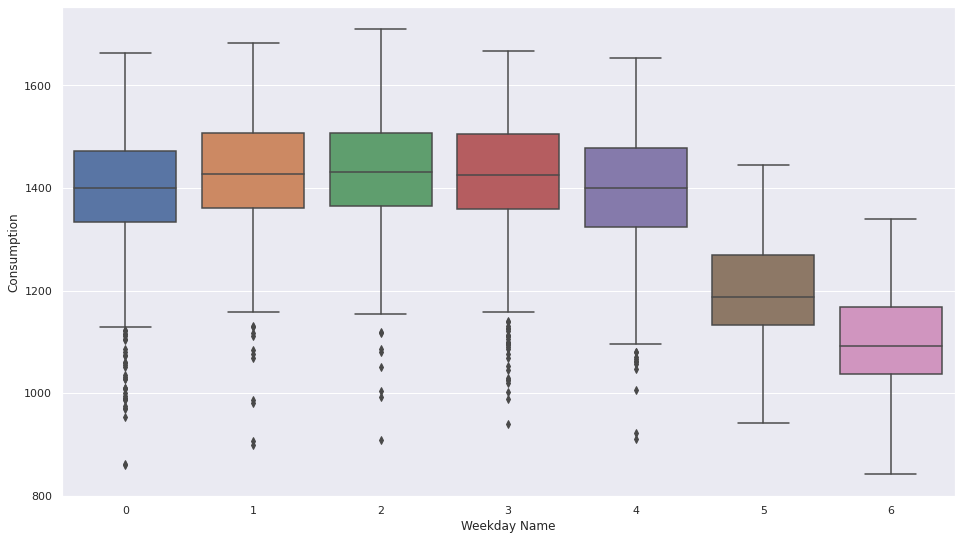

In [ ]:
sns.boxplot(x='Weekday Name', y='Consumption', data=data)

5 and 6 refers to Saturday and Sunday.

Clearly, weekdays have the highest power consumption days.



---



2. Frequencies

Let's try an example where we use the pd.date_range() together with the parameter freq to introduce a daily frequency to the date.

There are many more like H-hourly, B-business daily, M-monthly, Q-quarterly, A-annually and even 5D-every 5 days etc.

In [ ]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2004-09-20', periods=8, freq='H')  # returns a total of 8 hours on 20th September in 2004 for every hour

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

From our data, it should have a frequency of daily. Let's examine it.

In [ ]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

We see freq=None!

The reason is that pandas cannot tell if there is a frequency unless we explicitly set the frequency using the asfreq() like this (example):

In [ ]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consumption_sample = data.loc[times_sample, ['Consumption']].copy()
consumption_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [ ]:
# Using asfreq()
consumption_frequency = consumption_sample.asfreq('D')  # D - daily
consumption_frequency

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


We can see Pandas automatically generated the dates in between our given range. But not the values. Let's do forward fill(fill with previous non-null value) for the values.

In [ ]:
consumption_frequency['Consumption-FF'] = consumption_sample.asfreq('D', method='ffill')
consumption_frequency

,Consumption,Consumption-FF
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


3. Resampling

More often than not, we use downsampling instead of upsampling.

Downsampling involves an aggregation operation - getting total monthly sales from daily data.

Upsampling, on the other hand, involves interpolation or other filling method - getting the data for a 10-minute interval from an hourly data.

In [ ]:
data_col = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_col].resample('W').mean()
data_weekly_mean.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [ ]:
print(data.shape[0])
print(data_weekly_mean.shape[0])

4383
627


The consumption for 2006-01-01 is actually the mean consumption value from 2006-01-01 until 2006-01-07.

The weekly mean has exactly 1/7 data points from the original dataset.

Let's try to plot the Solar power production over a daily and weekly trend.

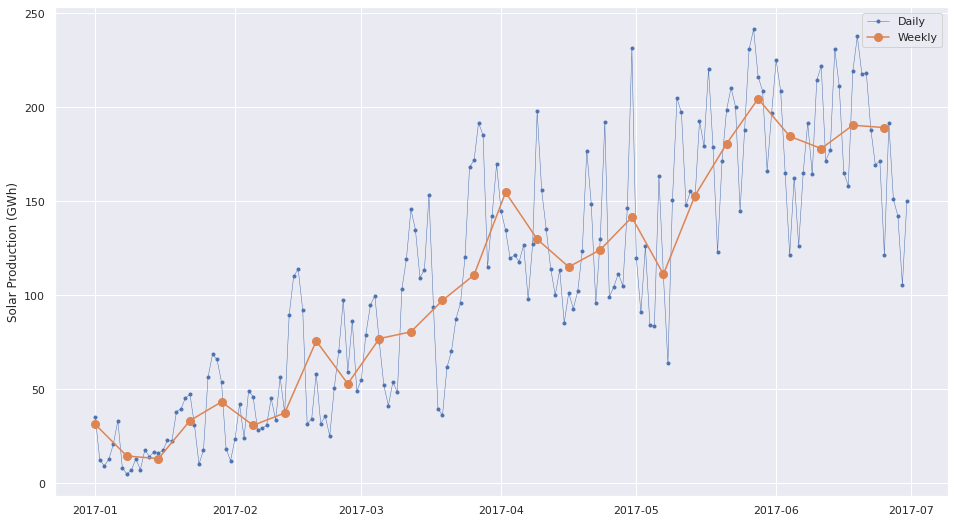

In [ ]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

The weekly graph is a much smoother graph.



---



Let's try resampling the data into monthly frequency, aggregating with sum totals instead of the mean.

In [ ]:
data_monthly_sum = data[data_col].resample('M').sum(min_count=28)
data_monthly_sum.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


Plotting the power consumption as a line graph, and the rest as a stacked area plot.

Text(0, 0.5, 'Monthly Total (GWh)')

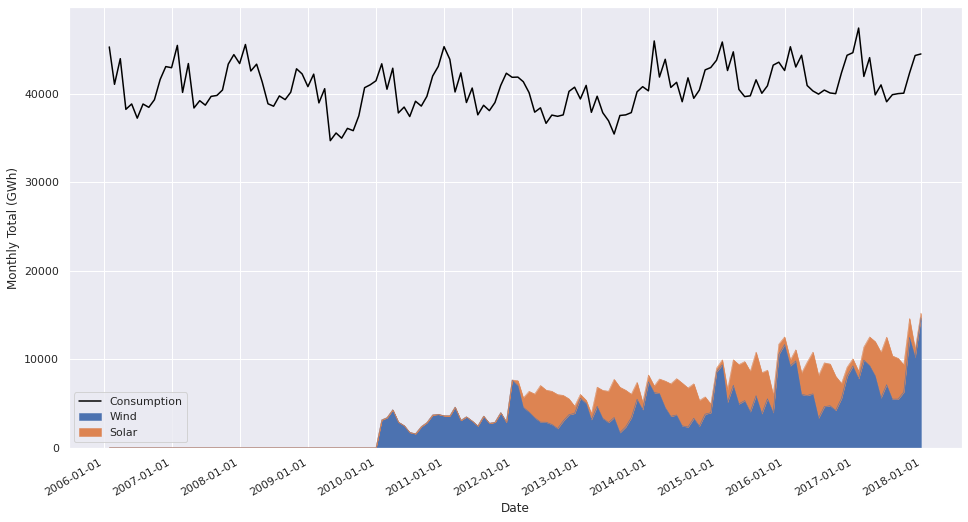

In [ ]:
fig, ax = plt.subplots()

ax.plot(data_monthly_sum['Consumption'], color='black', label='Consumption')

data_monthly_sum[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.legend()
ax.set_ylabel('Monthly Total (GWh)')



---



Let's try to further resample to annual frequency.

In [ ]:
data_annual = data[data_col].resample('A').sum(min_count=360)

data_annual = data_annual.set_index(data_annual.index.year)
data_annual.index.name = 'Year'

data_annual['Wind+Solar/Consumption Ratio'] = data_annual['Wind+Solar'] / data_annual['Consumption']
data_annual.tail(5)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption Ratio
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


Plot this ratio as a bar plot

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

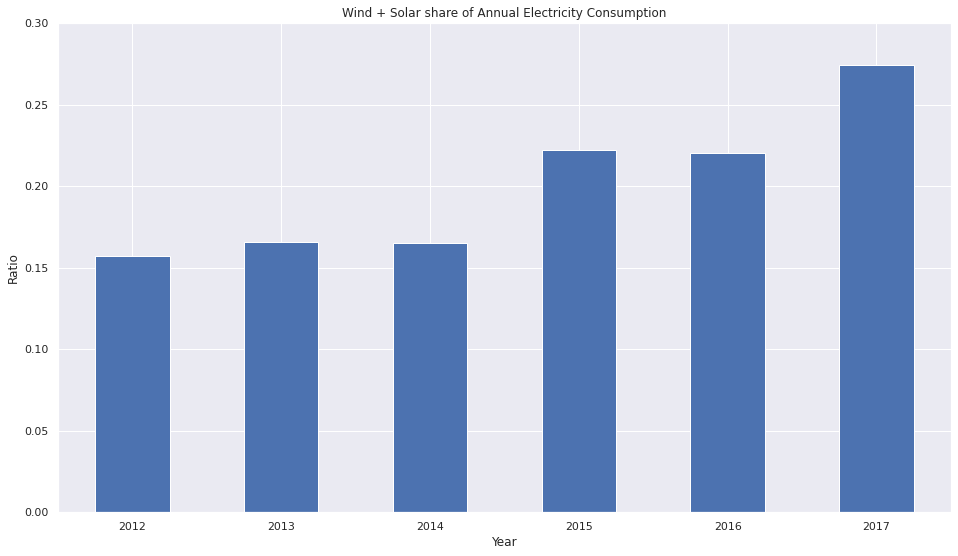

In [ ]:
ax = data_annual.loc[2012:, 'Wind+Solar/Consumption Ratio'].plot.bar()

ax.set_ylabel('Ratio')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar share of Annual Electricity Consumption')
plt.xticks(rotation=0)

4. Rolling windows

Rolling windows split the data into time windows and the data in each window is aggregated with a function like mean, median or sum. However, these time windows overlap, unlike downsampling, and the windows 'roll' along at the same frequency as the data.

We will use rolling to compute our 7-day rolling mean. The resultant rolling windows are:
- 2006-01-01 to 2006-01-07 as 2006-01-04
- 2006-01-02 to 2006-01-08 as 2006-01-05
- 2006-01-03 to 2006-01-09 as 2006-01-06
etc.

In [ ]:
data_7d_rolling = data[data_col].rolling(7, center=True).mean()
data_7d_rolling.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN


The first midpoint of the rolling window starts at 2006-01-04, hence the timestamps before this data have no data.

Let's plot this 7-day mean value together with our previous line plot.

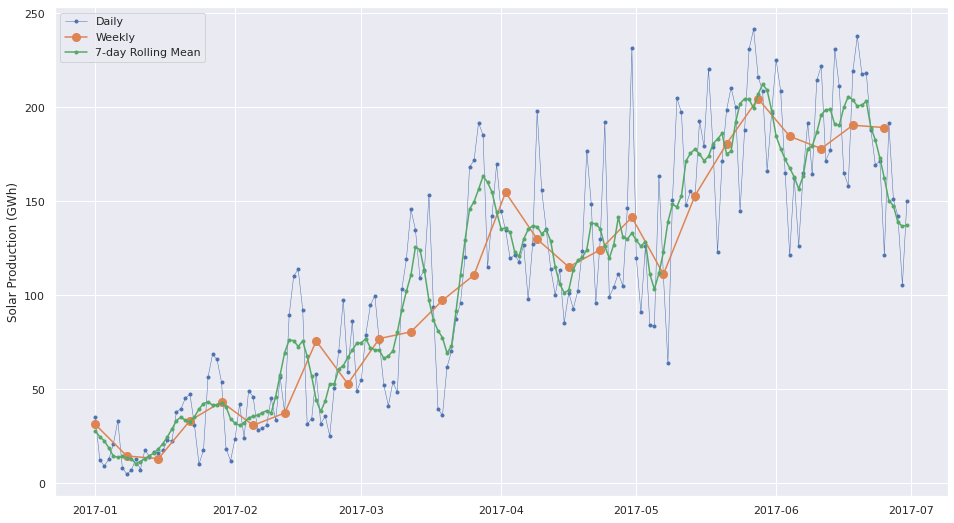

In [ ]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly')
ax.plot(data_7d_rolling.loc[start:end, 'Solar'], marker='.', linestyle='-', label='7-day Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend()

Important thing to note:
- The peaks and troughs of the rolling mean tend to follow closely with the peaks and troughs of the daily data, while those of the weekly resampled data are less closely aligned. This is due to the coarser granularity with the weekly resampled time series and also the non-overlapping pattern.

5. Trends

To visualize trends, an easy way to do this is with rolling means at different time scale.

In [ ]:
data_365d_rolling = data[data_col].rolling(365, center=True, min_periods=360).mean()


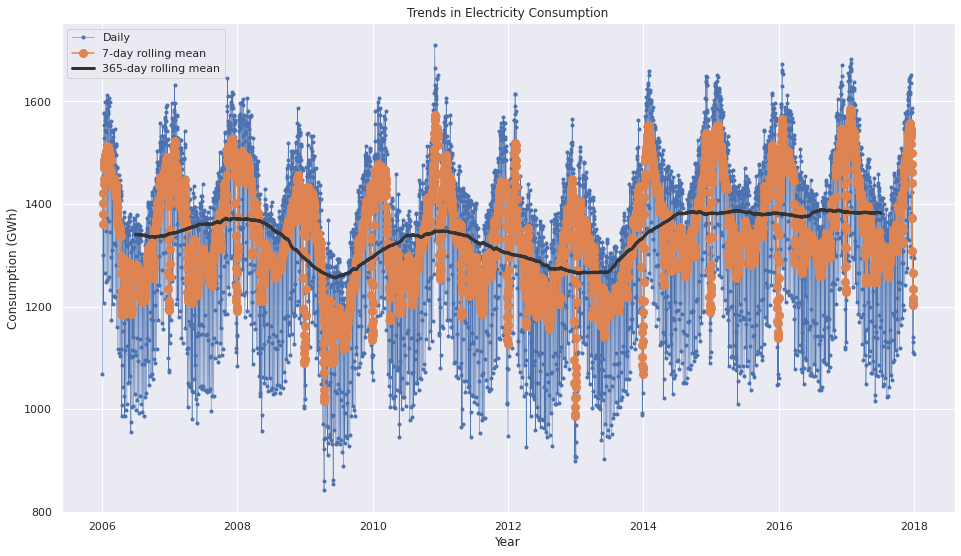

In [ ]:
fig, ax = plt.subplots()

ax.plot(data['Consumption'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_7d_rolling['Consumption'], marker='o', markersize=8, linestyle='-', label='7-day rolling mean')
ax.plot(data_365d_rolling['Consumption'], color='0.2', linewidth=3, label='365-day rolling mean')

ax.set_xlabel("Year")
ax.set_ylabel('Consumption (GWh)')
ax.set_title("Trends in Electricity Consumption")
ax.legend()

Let's visualize the trends for Wind, Solar and Wind+Solar

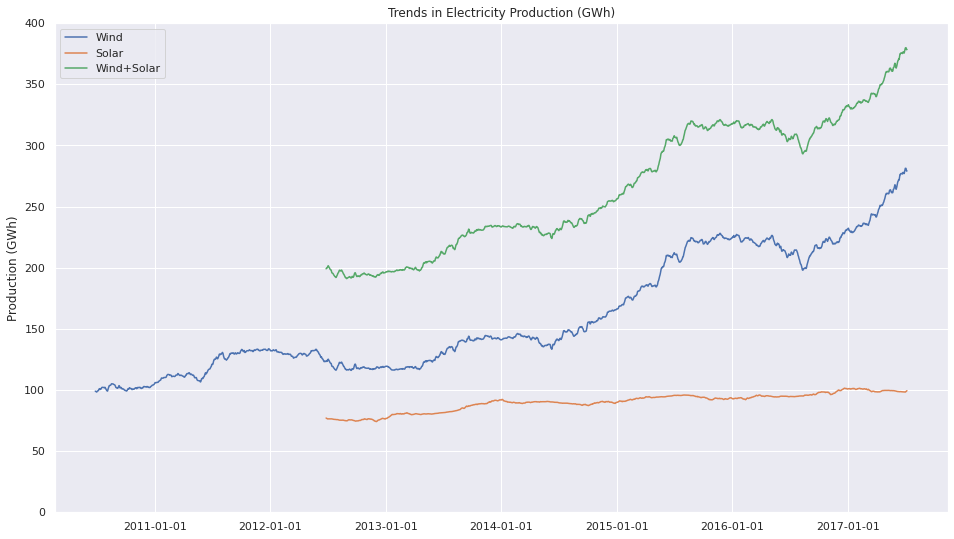

In [ ]:
fig, ax = plt.subplots()

for nm in ['Wind', 'Solar', 'Wind+Solar']:
  ax.plot(data_365d_rolling[nm], label=nm)

  ax.xaxis.set_major_locator(mdates.YearLocator())
  ax.set_ylim(0, 400)
  ax.legend()
  ax.set_ylabel('Production (GWh)')
  ax.set_title("Trends in Electricity Production (GWh)")

Quite a stable trend for solar production, but a hugely increasing trend for wind production.

# Things I Learnt

1. A year-wise box plot shows the overall trend, while a month-wise box plot shows the seasonality.
2. Resampling can help us obtain insights from the data from a different perspective.
3. Rolling window usually helps us understand better the data compared to resampling.
4. Patterns in a time series usually follow these components: Base level + Trend + Seasonality + Error
  - A time series may not have trend but have seasonality and vice versa.
  - Cyclic patterns is different from seasonal patterns such that cyclic events do not happen in fixed calendar-based intervals.
5. Additive time series
  - Value = Base level + Trend + Seasonality + Error
6. Multiplicative time series
  - Value = Base level x Trend x Seasonality x Error
7. Decomposing a time series into its components can get us the trend, seasonality and the residuals. Ideally, the residuals should NOT have any patterns as they are extracted out into the trend and seasonality.
8. A stationary time series is one where the values of the series is not a function of time - mean, variance, autocorrelation are constant over time.
  - Make a series stationary by:
    - Differencing the series (subtracting the next value with the current value)
    - Take the log of the series
    - Take the nth root of the series
    - Combination of all
  - Reason to make it stationary:
    - Removes any persistent autocorrelation (correlation of the series with its previous values; the previous values are helpful in predicting the current value)
9. One can check for seasonality of a time series by plotting the series in fixed time intervals like below and checking for repeatable patterns.
  - Hourly
  - Daily
  - Weekly
  - Monthly
  - Yearly
10. Use Autocorrelation Function (ACF) plot for more detailed inspection of seasonality.
11. Should NOT replace missing values with mean of the series, especially when the series is not stationary. Methods include:
  - Backward Fill
  - Forward Fill (usually lowest MSE)
  - Linear Interpolation
  - Quadratic Interpolation
  - Mean of nearest neighbors
  - Mean of seasonal counterparts

  * If we have enough past observations, forecast the missing values
  * If you have enough future observations, backcast the missing values

12. Approximate Entropy tells whether a time series is difficult to forecast - higher, harder.
13. Smoothing the series can remove noise effect
  - Rolling window - choose window size wisely (larger window size oversmooths the series)